# Bank Marketing
This dataset consists of direct marketing campaigns by a Portuguese banking institution using phone calls. The campaigns aimed to sell subscriptions to a bank term deposit (see variable `y`).


## Overview

- 🗺️ **Exploring**: What are the jobs of the people most likely to subscribe to a term deposit?
- 📊 **Visualizing**: Create a plot to visualize the number of people subscribing to a term deposit by `month`.
- 🔎 **Analyzing**: What impact does the number of contacts performed during the last campaign have on the likelihood that a customer subscribes to a term deposit?

Scenarios:

I work for a financial services firm. The past few campaigns have not gone as well as the firm would have hoped, and they are looking for ways to optimize their marketing efforts.

They have supplied me with data from a previous campaign and some additional metrics such as the consumer price index and consumer confidence index. They want to know whether I can predict the likelihood of subscribing to a term deposit. The manager would also like to know what factors are most likely to increase a customer's probability of subscribing.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm
from scipy.stats import chi2_contingency

bm = pd.read_csv("bank-marketing.csv", sep=";")
print(bm.shape)
bm.head(10)

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Dictionary
| Column | Variable | Class |
| --- | --------------- | --- |
| age | age of customer | |
| job | type of job | categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| marital | marital status | categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed |
| education | highest degree of customer | categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown" |
| default | has credit in default? | categorical: "no","yes","unknown" |
| housing | has housing loan? | categorical: "no","yes","unknown" |
| loan | has personal loan? | categorical: "no","yes","unknown" |
| contact | contact communication type | categorical: "cellular","telephone" |
| month | last contact month of year | categorical: "jan", "feb", "mar", ..., "nov", "dec" |
| day_of_week | last contact day of the week | categorical: "mon","tue","wed","thu","fri" |
| campaign | number of contacts performed during this campaign and for this client | numeric, includes last contact |
| pdays | number of days that passed by after the client was last contacted from a previous campaign | numeric; 999 means client was not previously contacted |
| previous | number of contacts performed before this campaign and for this client | numeric |
| poutcome | outcome of the previous marketing campaign | categorical: "failure","nonexistent","success" |
| emp.var.rate | employment variation rate - quarterly indicator | numeric |
| cons.price.idx | consumer price index - monthly indicator | numeric   |
| cons.conf.idx | consumer confidence index - monthly indicator | numeric |   
| euribor3m | euribor 3 month rate - daily indicator | numeric |
| nr.employed | number of employees - quarterly indicator | numeric |
| y | has the client subscribed a term deposit? | binary: "yes","no" |

In [2]:
bm.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


this table offer a brief summary of the dataset's central tendency, dispersion, and distribution shape for further analysis.

In [3]:
# replace outlier from duration and campaign column with their respective mean

def replace_outliers_with_mean(df, column):
  """Replaces outliers in a DataFrame column with the mean of the column.

  Args:
    df: The pandas DataFrame.
    column: The name of the column to process.
  """
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].mean()

replace_outliers_with_mean(bm, 'duration')
replace_outliers_with_mean(bm, 'campaign')


<ipython-input-3-7eb8f187b70c>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '258.2850101971448' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].mean()
<ipython-input-3-7eb8f187b70c>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.567592502670681' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].mean()


Replacing outliers in the duration and campaign columns with their respective means helps maintain the overall structure of the dataset while reducing the impact of extreme values.

In [ ]:
# add a new column "num_y" to where every y = yes means 1 and y = no means 0

bm['num_y'] = bm['y'].apply(lambda x: 1 if x == 'yes' else 0)


added new column that contain numerical value alternative enable easier computation, improve model interpretability, and facilitate tasks such as correlation analysis, regression, and classification.

[Source](https://archive.ics.uci.edu/ml/datasets/bank+marketing) of dataset.


##Visualization of categorical dataset value
this visualization helps us in understanding patterns, distributions, and relationships within the data.

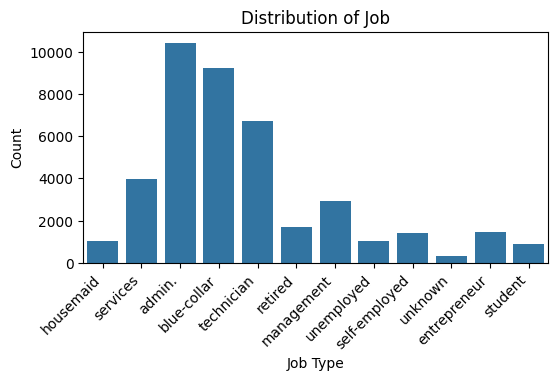

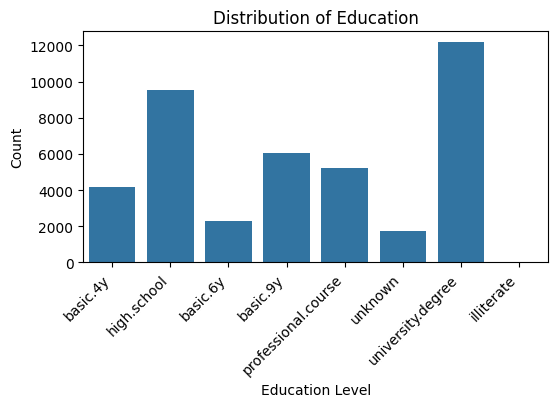

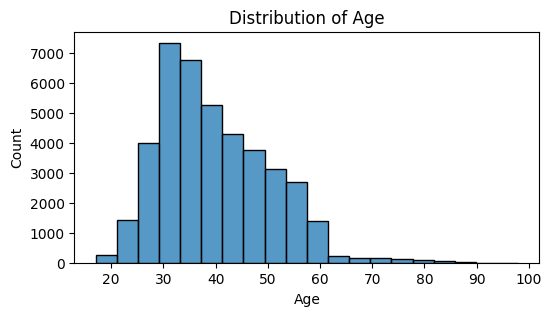

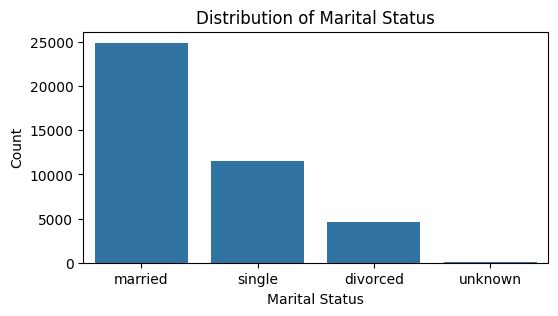

In [ ]:
# visualization of distribution of job, education, age, and marital

plt.figure(figsize=(6, 3))
sns.countplot(x='job', data=bm)
plt.title('Distribution of Job')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize the distribution of education
plt.figure(figsize=(6, 3))
sns.countplot(x='education', data=bm)
plt.title('Distribution of Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize the distribution of age
plt.figure(figsize=(6, 3))
sns.histplot(bm['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of marital status
plt.figure(figsize=(6, 3))
sns.countplot(x='marital', data=bm)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


Using this countplot (bar chart), we further explore the correlation between the mentioned factors and age for further data exploration

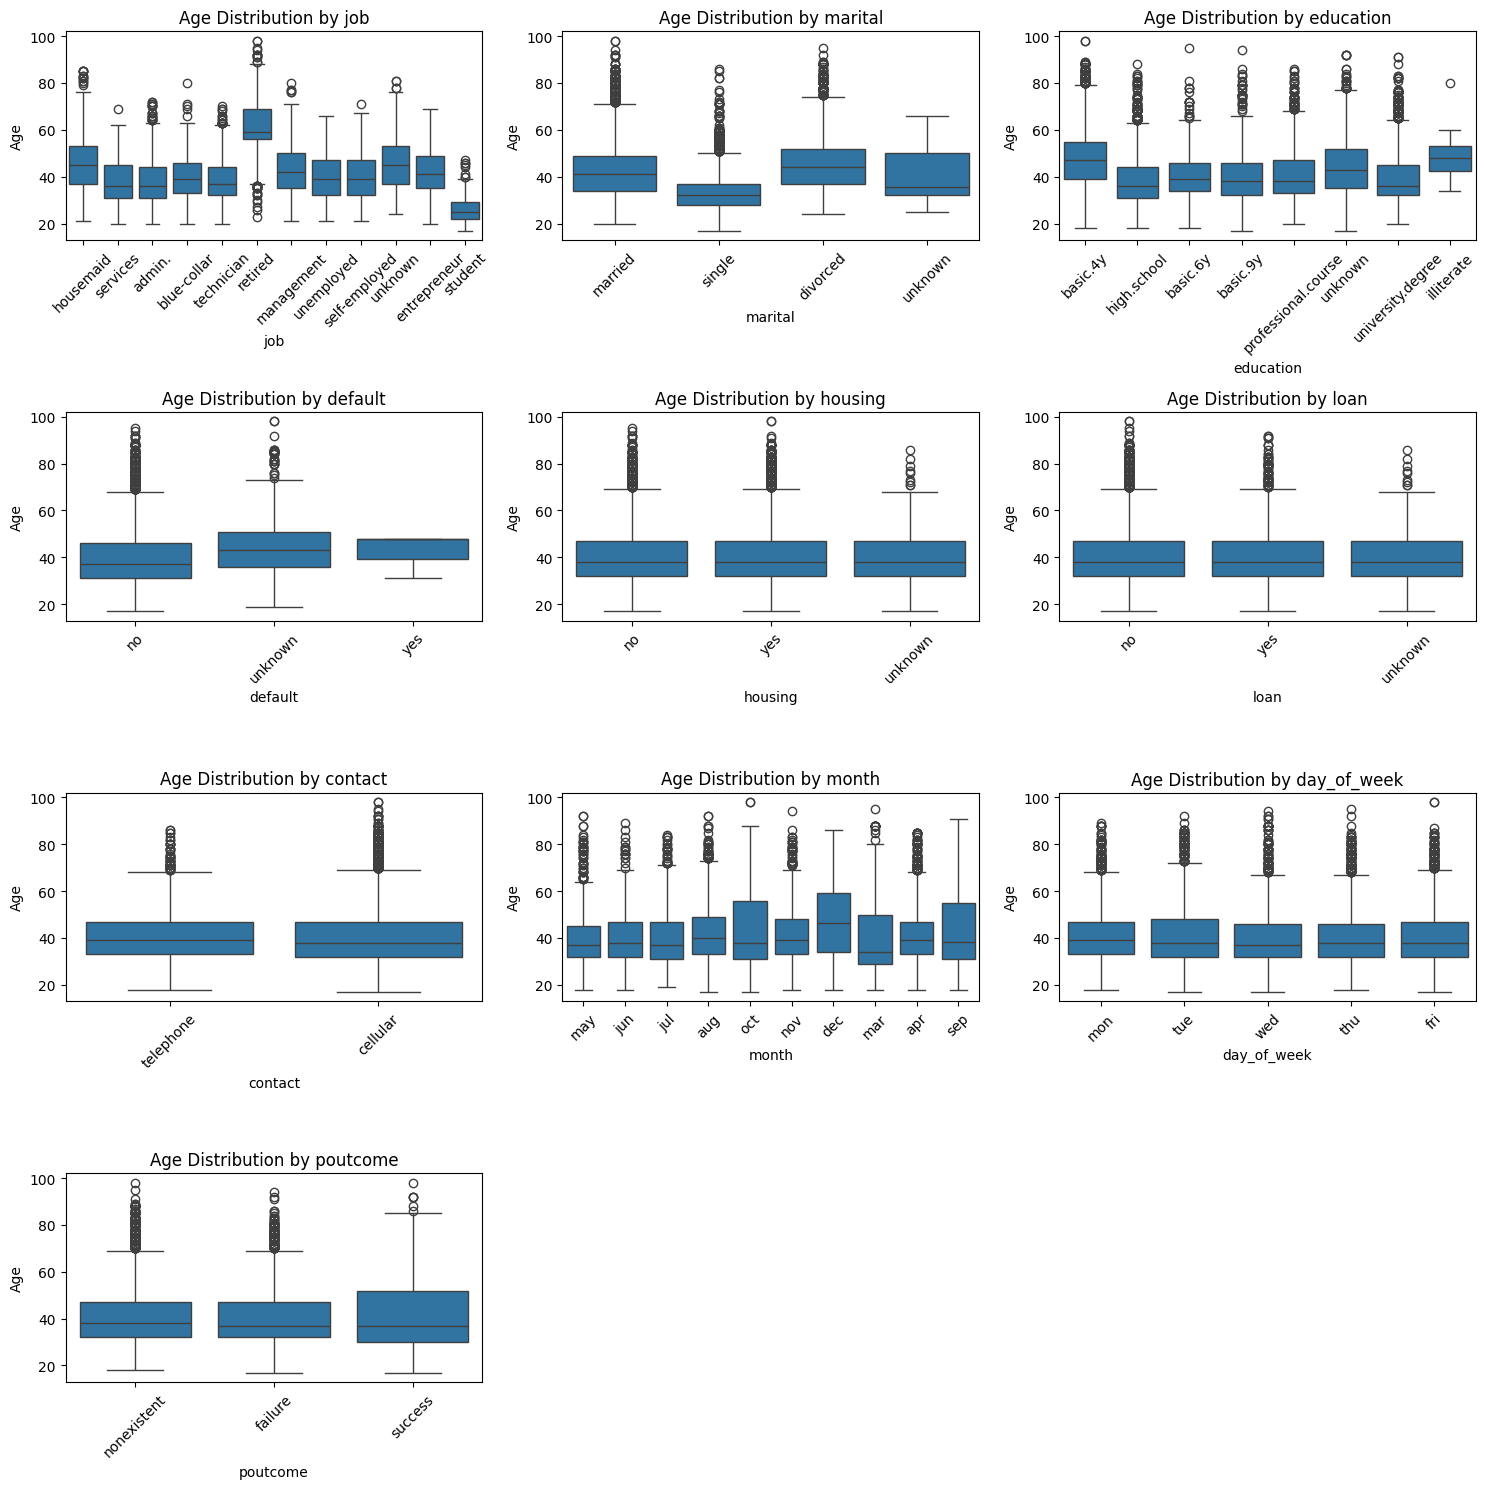

In [ ]:
# visualize the distribution of age for each categorical columns, use subplot to show the results in grid

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                   'month', 'day_of_week', 'poutcome']

# Create subplots in a grid
num_cols = 3
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate through categorical columns and create distribution plots
for i, col in enumerate(categorical_cols):
  row = i // num_cols
  col_idx = i % num_cols
  ax = axes[row, col_idx]

  sns.boxplot(x=col, y='age', data=bm, ax=ax)
  ax.set_title(f'Age Distribution by {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Age')
  ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(len(categorical_cols), num_rows * num_cols):
  row = i // num_cols
  col_idx = i % num_cols
  fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()



##Categorical Variable
Conducting a deeper analysis of the correlation between categorical variables.

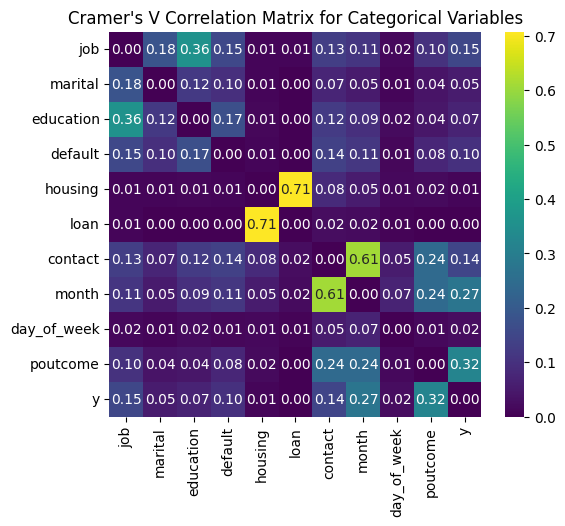

In [ ]:
# heatmap correlation for each columns that consist of categorical values with cramer v

def cramers_v(x, y):
  """Calculate Cramer's V statistic for categorical-categorical association.

  Args:
    x: Series or array-like representing the first categorical variable.
    y: Series or array-like representing the second categorical variable.

  Returns:
    The Cramer's V statistic, which measures the association between x and y.
  """
  confusion_matrix = pd.crosstab(x, y)
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2 / n
  r, k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
  rcorr = r - ((r - 1)**2) / (n - 1)
  kcorr = k - ((k - 1)**2) / (n - 1)
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


# Select only categorical columns
categorical_columns = bm.select_dtypes(include=['object']).columns

# Create a correlation matrix using Cramer's V
correlation_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                 index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            correlation_matrix.loc[col1, col2] = cramers_v(bm[col1], bm[col2])

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Cramer's V Correlation Matrix for Categorical Variables")
plt.show()


In this heatmap, our main focus is on variable Y, which shows a significant correlation with poutcome, month, contact, and job.

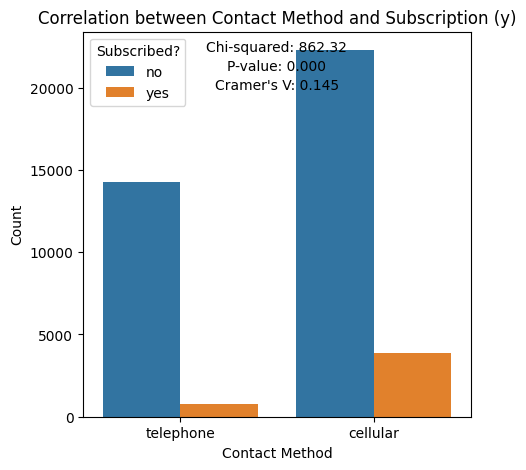

In [ ]:
# visualize the correlation of contact to y, along with the meaning of the chi squared, alpha, and cramer's v result

# Create a contingency table for contact and y
contingency_table = pd.crosstab(bm['contact'], bm['y'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
rcorr = r - ((r - 1)**2) / (n - 1)
kcorr = k - ((k - 1)**2) / (n - 1)
cramers_v_value = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


# Visualize the correlation using a bar chart
plt.figure(figsize=(5, 5))
sns.countplot(x='contact', hue='y', data=bm)
plt.title('Correlation between Contact Method and Subscription (y)')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.legend(title='Subscribed?')

# Add text annotations with Chi-squared, alpha, and Cramer's V
plt.text(0.5, 0.95, f"Chi-squared: {chi2:.2f}", transform=plt.gca().transAxes, ha='center')
plt.text(0.5, 0.9, f"P-value: {p:.3f}", transform=plt.gca().transAxes, ha='center')
plt.text(0.5, 0.85, f"Cramer's V: {cramers_v_value:.3f}", transform=plt.gca().transAxes, ha='center')

plt.show()


Chi-squared test:
The Chi-squared statistic measures the difference between observed and expected frequencies in the contingency table.
A larger Chi-squared value indicates a greater difference between observed and expected, suggesting a potential association.
The P-value represents the probability of observing such a difference (or more extreme) if there's no association between the variables.
A small P-value (typically less than 0.05) suggests evidence against the null hypothesis (no association) and indicates a statistically significant association.

Cramer's V:
Cramer's V is a measure of association for nominal variables, ranging from 0 to 1.
A value of 0 indicates no association, and a value of 1 indicates a perfect association.
The value of Cramer's V helps quantify the strength of the association between the variables.

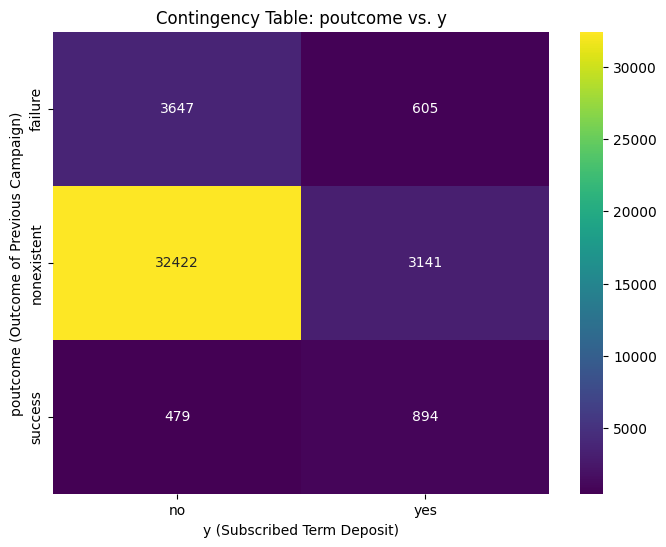

Chi-square statistic: 4230.52
P-value: 0.000


In [ ]:
# visualize the correlation of poutcome and y

# Create a contingency table
contingency_table = pd.crosstab(bm['poutcome'], bm['y'])

# Calculate the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Visualize the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')
plt.title('Contingency Table: poutcome vs. y')
plt.xlabel('y (Subscribed Term Deposit)')
plt.ylabel('poutcome (Outcome of Previous Campaign)')
plt.show()

print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.3f}")

# Interpretation:
# If the p-value is less than a significance level (e.g., 0.05), we reject the null hypothesis
# that poutcome and y are independent.
# This suggests there's a significant association between the outcome of the previous campaign
# and whether a customer subscribed to a term deposit.


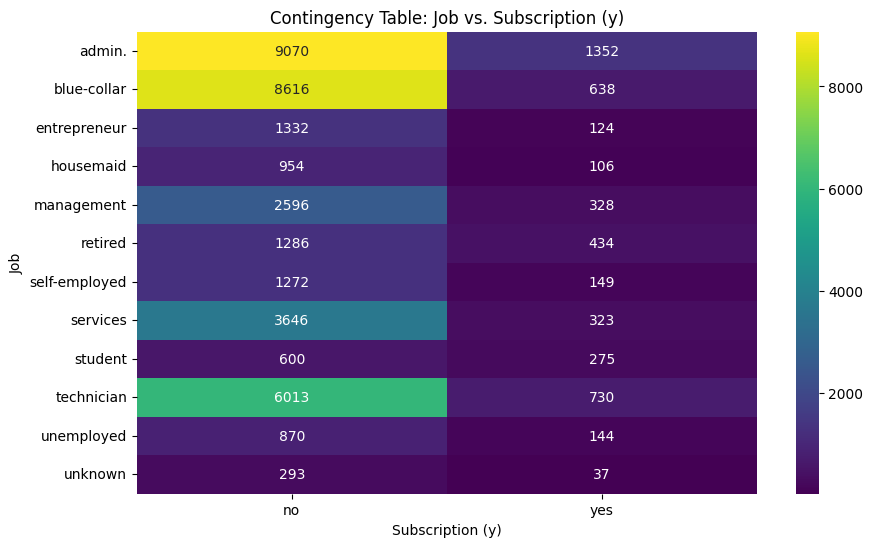

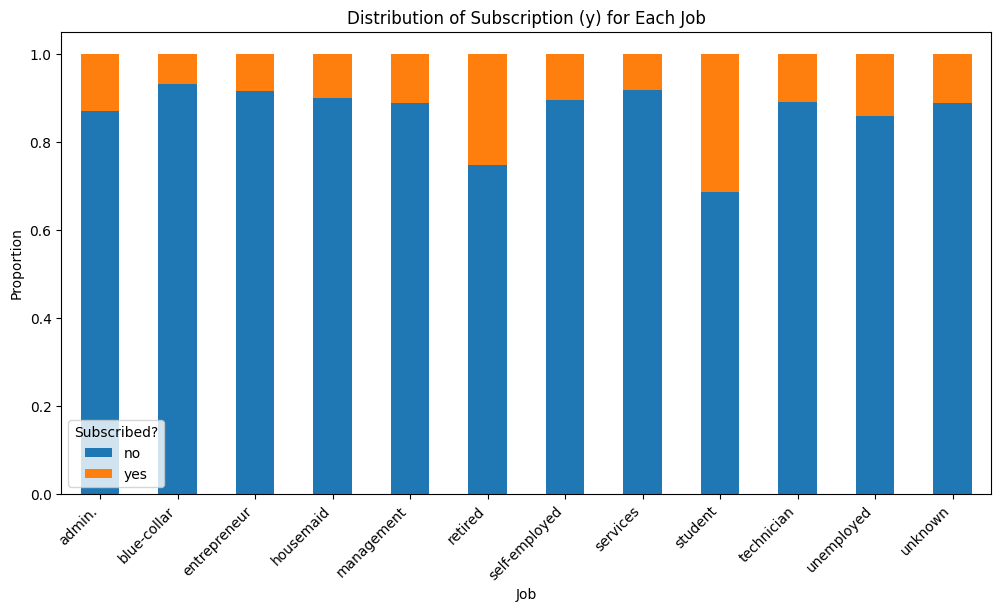

In [ ]:
#visualize the correlation of job to y using contingency table, and the distribution of y for each job

# Create a contingency table for job and y
contingency_table_job_y = pd.crosstab(bm['job'], bm['y'])

# Visualize the contingency table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_job_y, annot=True, fmt='d', cmap='viridis')
plt.title('Contingency Table: Job vs. Subscription (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Job')
plt.show()


# Calculate the distribution of y for each job
y_distribution_by_job = bm.groupby(['job', 'y'])['y'].count().unstack()

# Normalize the distribution to show proportions
y_distribution_by_job = y_distribution_by_job.div(y_distribution_by_job.sum(axis=1), axis=0)

# Visualize the distribution of y for each job
y_distribution_by_job.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Subscription (y) for Each Job')
plt.xlabel('Job')
plt.ylabel('Proportion')
plt.legend(title='Subscribed?')
plt.xticks(rotation=45, ha='right')
plt.show()



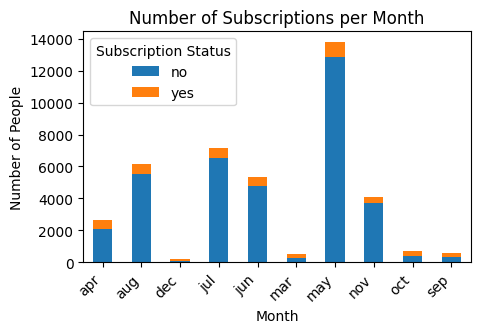

In [ ]:
# visualize the number of people that subscribe to y each month

# Group the data by month and y (subscription status), then count the number of subscriptions
subscription_counts = bm.groupby(['month', 'y'])['y'].count().unstack()

# Fill NaN values with 0 (if any month doesn't have subscriptions for a specific status)
subscription_counts = subscription_counts.fillna(0)

# Plot the subscription counts for each month
subscription_counts.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('Number of Subscriptions per Month')
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.legend(title='Subscription Status')
plt.xticks(rotation=45, ha='right')
plt.show()


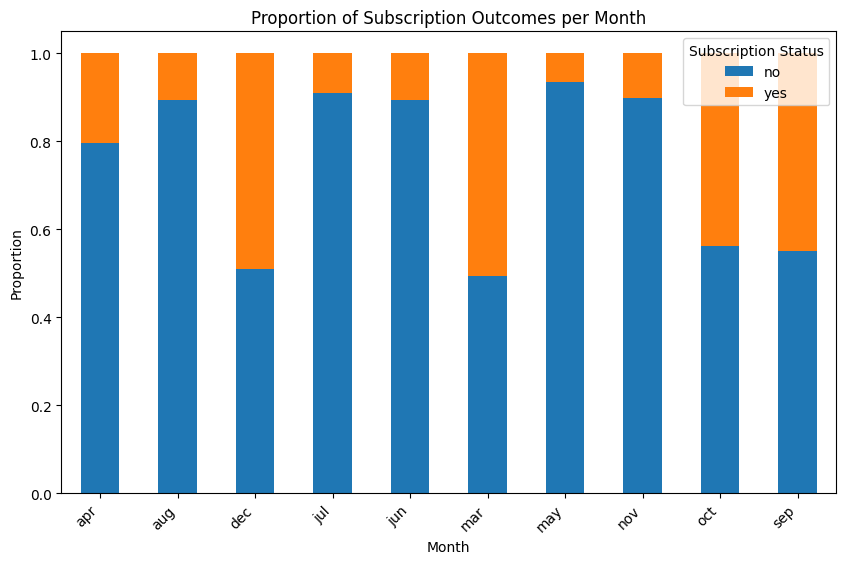

In [ ]:
# visualize the proportion of each y outcome every month as a stacked bar

# Group the data by month and y (subscription status), then count the number of subscriptions
subscription_counts = bm.groupby(['month', 'y'])['y'].count().unstack()

# Fill NaN values with 0 (if any month doesn't have subscriptions for a specific status)
subscription_counts = subscription_counts.fillna(0)

# Calculate the proportion of each y outcome for each month
subscription_proportions = subscription_counts.div(subscription_counts.sum(axis=1), axis=0)

# Plot the stacked bar chart
subscription_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Subscription Outcomes per Month')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.legend(title='Subscription Status')
plt.xticks(rotation=45, ha='right')
plt.show()


#Numerical Variable
Conducting a deeper analysis of the correlation between numerical variables.

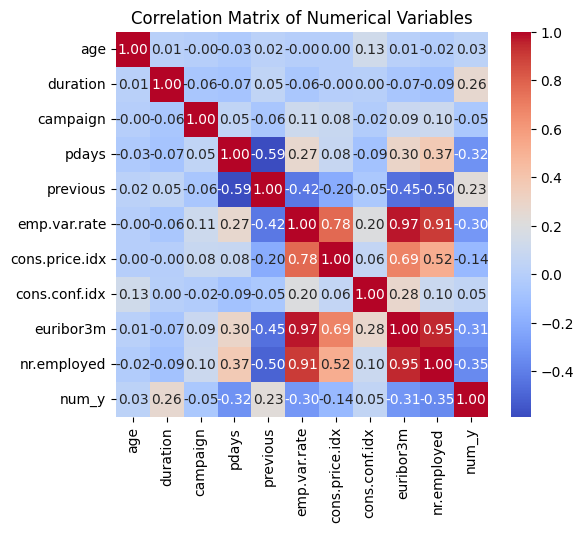

In [ ]:
# visualize the correlation heatmap between the numerical columns

# Select only numerical columns
numerical_columns = bm.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = bm[numerical_columns].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  num_y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     3040.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:57:34   Log-Likelihood:                -9549.7
No. Observations:               41188   AIC:                         1.910e+04
Df Residuals:                   41186   BIC:                         1.912e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0131      0.003     -4.794      0.0

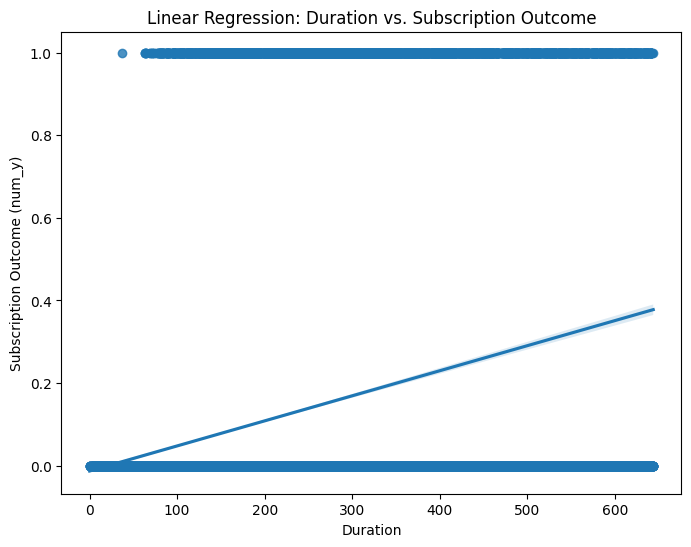


Mean Duration for Each Outcome with 95% Confidence Interval:


,mean,sem,lower_ci,upper_ci
num_y,,,,
0,194.454021,0.691380,193.098916,195.809126
1,307.717441,1.893109,304.006948,311.427934


In [ ]:
# visualize and use linear regression to show correlation of duration to num_y outcome, also calculate the mean duration for each outcome along with the confidence level

# Perform linear regression
model = sm.ols('num_y ~ duration', data=bm).fit()

# Print the regression summary
print(model.summary())

# Plot the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='duration', y='num_y', data=bm)
plt.title('Linear Regression: Duration vs. Subscription Outcome')
plt.xlabel('Duration')
plt.ylabel('Subscription Outcome (num_y)')
plt.show()


# Calculate mean duration for each outcome and confidence interval
mean_duration_by_outcome = bm.groupby('num_y')['duration'].agg(['mean', 'sem'])  # sem for standard error of the mean
mean_duration_by_outcome['lower_ci'] = mean_duration_by_outcome['mean'] - 1.96 * mean_duration_by_outcome['sem']
mean_duration_by_outcome['upper_ci'] = mean_duration_by_outcome['mean'] + 1.96 * mean_duration_by_outcome['sem']

print("\nMean Duration for Each Outcome with 95% Confidence Interval:")
mean_duration_by_outcome


                            OLS Regression Results                            
Dep. Variable:                  num_y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2304.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:57:43   Log-Likelihood:                -9895.1
No. Observations:               41188   AIC:                         1.979e+04
Df Residuals:                   41186   BIC:                         1.981e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0872      0.002     54.308      0.0

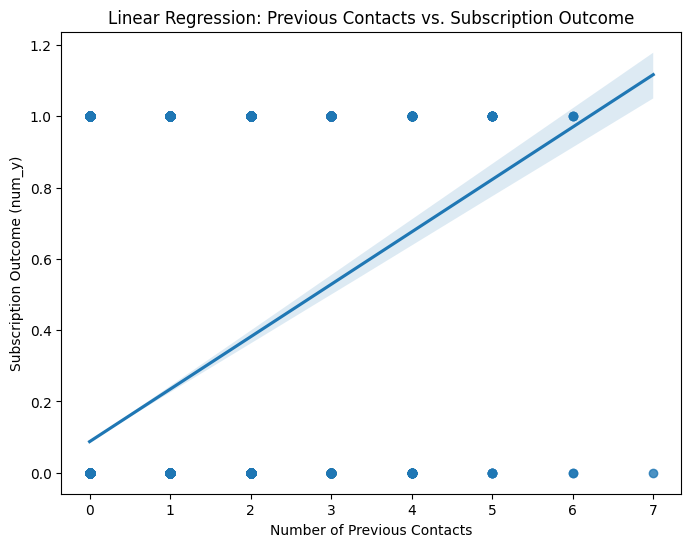


Mean Previous Contacts for Each Outcome with 95% Confidence Interval:


,mean,sem,lower_ci,upper_ci
num_y,,,,
0,0.132374,0.00214,0.128179,0.136569
1,0.492672,0.01263,0.467917,0.517428


In [ ]:
# visualize and use linear regression to show correlation of previous to num_y outcome, also calculate the mean previous for each outcome along with the confidence level

# Perform linear regression
model = sm.ols('num_y ~ previous', data=bm).fit()

# Print the regression summary
print(model.summary())

# Plot the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='previous', y='num_y', data=bm)
plt.title('Linear Regression: Previous Contacts vs. Subscription Outcome')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Subscription Outcome (num_y)')
plt.show()


# Calculate mean previous contacts for each outcome and confidence interval
mean_previous_by_outcome = bm.groupby('num_y')['previous'].agg(['mean', 'sem'])  # sem for standard error of the mean
mean_previous_by_outcome['lower_ci'] = mean_previous_by_outcome['mean'] - 1.96 * mean_previous_by_outcome['sem']
mean_previous_by_outcome['upper_ci'] = mean_previous_by_outcome['mean'] + 1.96 * mean_previous_by_outcome['sem']

print("\nMean Previous Contacts for Each Outcome with 95% Confidence Interval:")
mean_previous_by_outcome


                            OLS Regression Results                            
Dep. Variable:                  num_y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     4861.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:57:59   Log-Likelihood:                -8718.6
No. Observations:               41188   AIC:                         1.744e+04
Df Residuals:                   41186   BIC:                         1.746e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6416      0.008     83.019      0.0

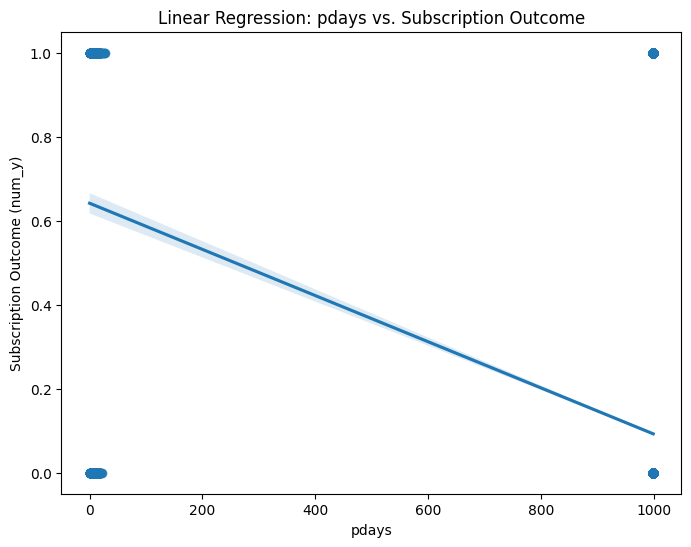


Mean pdays for Each Outcome with 95% Confidence Interval:


,mean,sem,lower_ci,upper_ci
num_y,,,,
0,984.113878,0.631132,982.876859,985.350896
1,792.035560,5.922221,780.428007,803.643114


In [ ]:
# visualize and use linear regression to show correlation of pdays to num_y outcome, also calculate the mean pdays for each outcome along with the confidence level

# Perform linear regression
model = sm.ols('num_y ~ pdays', data=bm).fit()

# Print the regression summary
print(model.summary())

# Plot the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='pdays', y='num_y', data=bm)
plt.title('Linear Regression: pdays vs. Subscription Outcome')
plt.xlabel('pdays')
plt.ylabel('Subscription Outcome (num_y)')
plt.show()


# Calculate mean pdays for each outcome and confidence interval
mean_pdays_by_outcome = bm.groupby('num_y')['pdays'].agg(['mean', 'sem'])  # sem for standard error of the mean
mean_pdays_by_outcome['lower_ci'] = mean_pdays_by_outcome['mean'] - 1.96 * mean_pdays_by_outcome['sem']
mean_pdays_by_outcome['upper_ci'] = mean_pdays_by_outcome['mean'] + 1.96 * mean_pdays_by_outcome['sem']

print("\nMean pdays for Each Outcome with 95% Confidence Interval:")
mean_pdays_by_outcome


#Insight
### Business Insights on Factors Influencing Subscription Probability  


1. Customers with a previously successful outcome (poutcome) have a 50% likelihood of subscribing again in the following year.  
2. Individuals in the "student" and "retired" job categories have a higher subscription rate compared to other groups.  
3. There is a strong correlation between call duration and subscription status. The average call duration for non-subscribers is 194.45 seconds, while for subscribers, it is 307.71 seconds. This suggests that to maximize subscriptions, call durations should ideally be at least 307.71 seconds.  